### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read  Data

In [5]:
df = pd.read_csv('fifa.csv')
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  Composure Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0           28.0           26.0       6.0        11.0   
1      95.0    28.0           31.0           23.0       7.0        11.0   
2      94.0    27.0           24.0           33.0       9.0         9.0   
3      68.0    15.0           21.0           13.0      90.0        85.0   
4      88.0    68.0           58.0           51.0      15.0        13.0   

  GKKicking GKPositioning GKReflexes  Release Clause  
0      15.0          14.0        8.0         €226.5M  
1      15.0          14.0       11.0         €127.1M  
2      15.0          15.0       11.0         €228.1M  
3      87.0          88.0       94.0         €138.6M  
4       5.0          10.0       13.0         €196.4M  

[5 rows x 60 columns]

In [6]:
df.shape

(18207, 60)

### 2.	Drop any columns that you deem unecessary for analysis

In [7]:
df.drop(['ID','Photo','Nationality','Flag','Club Logo','Jersey Number','Loaned From'],axis=1,inplace=True)

### 3. Column Conversion

In [8]:
def val(s):
    new = ''
    if s[-1] == 'M':
        new = str(float(s[:-1]) * 1000)
    else:
        new = s
    return new
v = df['Value'].str.replace('€','')
v = v.str.replace('K','')
v = v.apply(val)
v = v.astype(float)
df["Value"] = v
df["Value"]

0        110500.0
1         77000.0
2        118500.0
3         72000.0
4        102000.0
           ...   
18202        60.0
18203        60.0
18204        60.0
18205        60.0
18206        60.0
Name: Value, Length: 18207, dtype: float64

In [9]:
s = df['Wage'].str.replace('€','')
s = s.str.replace('K','')
s = s.apply(val)
s = s.astype(float)
df['Wage'] = s
df['Wage']

0        565.0
1        405.0
2        290.0
3        260.0
4        355.0
         ...  
18202      1.0
18203      1.0
18204      1.0
18205      1.0
18206      1.0
Name: Wage, Length: 18207, dtype: float64

In [10]:
year = pd.to_datetime(df['Joined']).dt.year
#df['Joined'].fillna(df['Joined'].median()[0],inplace=True)
#df['Joined'] = df['Joined'].astype(int)
year.fillna(year.mode()[0],inplace=True)
year = year.astype(int)
df['Joined'] = year
df['Joined']

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._update_inplace(new_data)


0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

In [11]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])
df['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [12]:
df['Height'] = df['Height'].str.replace("'",".").astype(float)
df['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [13]:
df['Weight'] = df['Weight'].str.replace('lbs','').astype(float)
df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [14]:
m = df['Release Clause'].str.replace('€','')
m = m.str.replace('K','')
m = m.fillna('0')
m = m.apply(val)
m = m.astype(float)
df['Release Clause'] = m
df['Release Clause']

0        226500.0
1        127100.0
2        228100.0
3        138600.0
4        196400.0
           ...   
18202       143.0
18203       113.0
18204       165.0
18205       143.0
18206       165.0
Name: Release Clause, Length: 18207, dtype: float64

### 4.	Check for missing values and do a mean imputation where necessary. 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 53 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Joined                      18207 non-null int32
Contract Valid Until        17918 non-null datetime64[ns]
Height                      18159 non-null float64
Weight                      181

In [16]:
features = []
for i in df.columns:
    features.append(i)
for i in features:
    if df[i].isnull().sum()>1:
        print (i,' has',df[i].isnull().sum(),' null values out of ',df.shape[0])

Club  has 241  null values out of  18207
Preferred Foot  has 48  null values out of  18207
International Reputation  has 48  null values out of  18207
Weak Foot  has 48  null values out of  18207
Skill Moves  has 48  null values out of  18207
Work Rate  has 48  null values out of  18207
Body Type  has 48  null values out of  18207
Position  has 60  null values out of  18207
Contract Valid Until  has 289  null values out of  18207
Height  has 48  null values out of  18207
Weight  has 48  null values out of  18207
Crossing  has 48  null values out of  18207
Finishing  has 48  null values out of  18207
HeadingAccuracy  has 48  null values out of  18207
ShortPassing  has 48  null values out of  18207
Volleys  has 48  null values out of  18207
Dribbling  has 48  null values out of  18207
Curve  has 48  null values out of  18207
FKAccuracy  has 48  null values out of  18207
LongPassing  has 48  null values out of  18207
BallControl  has 48  null values out of  18207
Acceleration  has 48  nul

In [17]:
df["Club"].fillna('No Club',inplace=True)
df['Position'].fillna('None',inplace=True)
df['Contract Valid Until'].fillna(df['Contract Valid Until'].max(),inplace=True)
df['Preferred Foot'].fillna(df['Preferred Foot'].mode()[0],inplace=True)
df['International Reputation'].fillna(1.0,inplace=True)
df['Weak Foot'].fillna(1.0,inplace=True)
df['Skill Moves'].fillna(1.0,inplace=True)
df['Work Rate'].fillna('Low/ Low',inplace=True)
df['Body Type'].fillna('Normal',inplace=True)

In [18]:
#features.remove('Loaned From')
for i in features:
    if df[i].isnull().sum()==48:
        df[i].fillna(df[i].min(),inplace=True)

In [19]:
df.isnull().sum()

Name                        0
Age                         0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower 

### 1.	Plot the distribution of Overall rating for all players. 

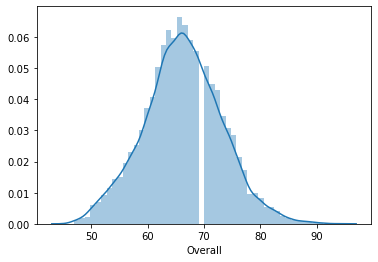

In [20]:
sns.distplot(df['Overall'])
plt.show()

### 2.	Generate pair plots for the following variables:
###      Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


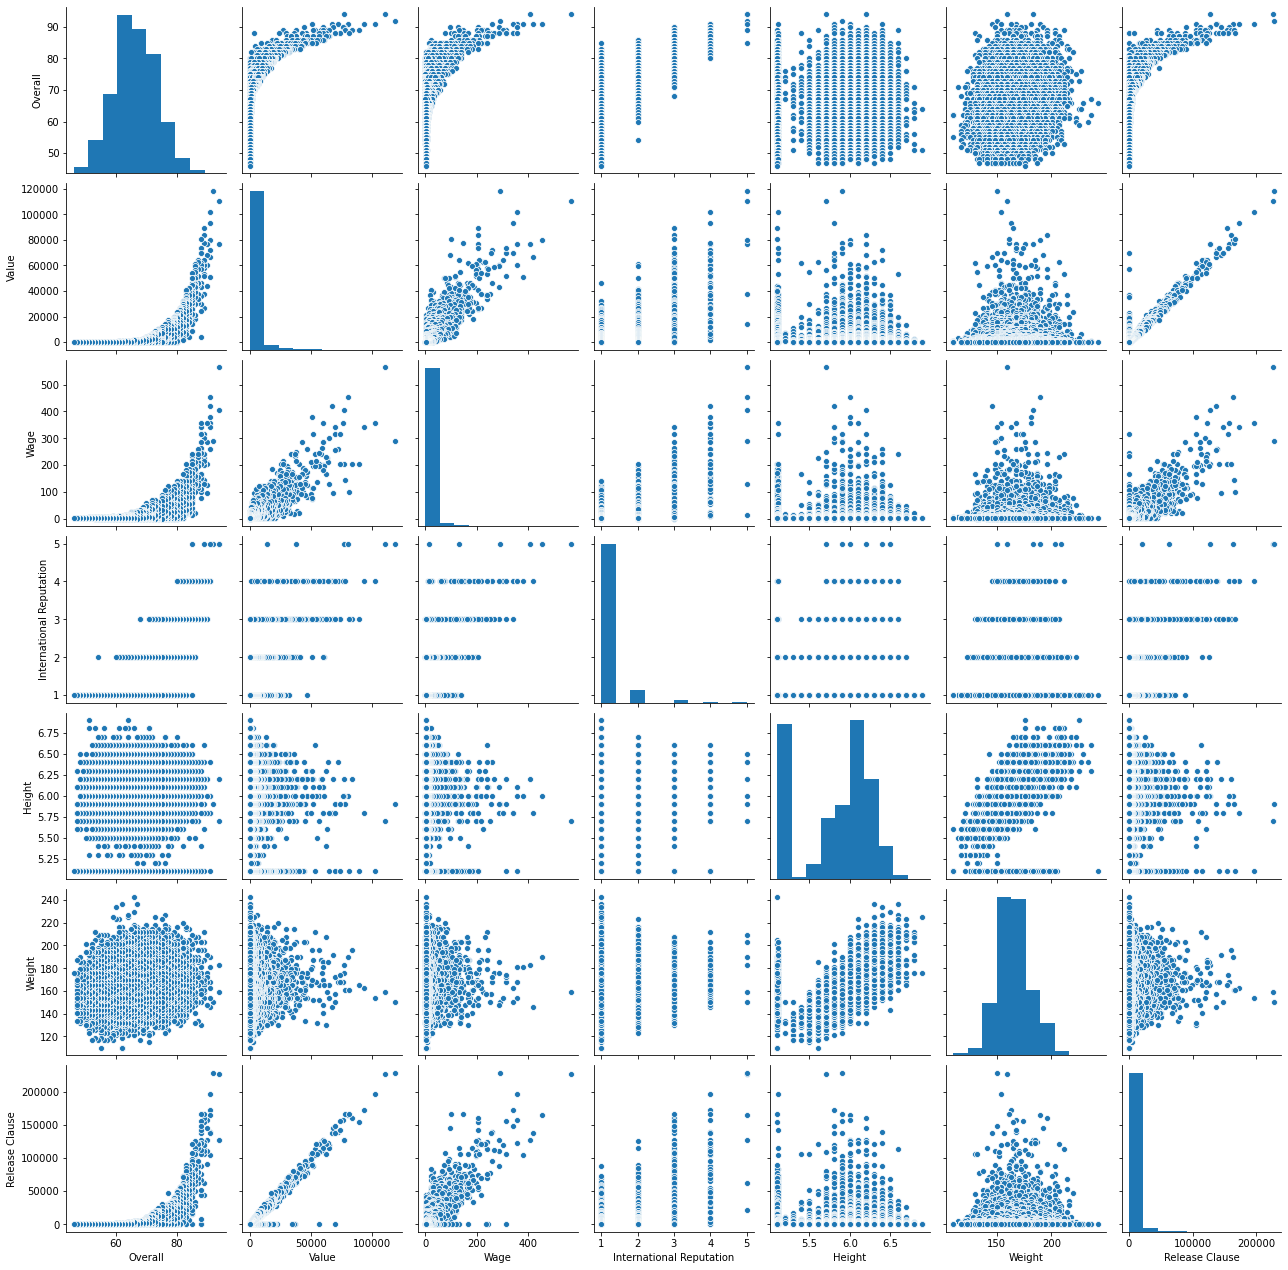

In [21]:
sns.pairplot(df[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [22]:
top20 = df[df['Contract Valid Until'].dt.year==2020].nlargest(20,'Overall')
top20

Name  Age  Overall  Potential                 Club    Value  \
3            De Gea   27       91         93    Manchester United  72000.0   
5         E. Hazard   27       91         91              Chelsea  93000.0   
6         L. Modrić   32       91         91          Real Madrid  67000.0   
8      Sergio Ramos   32       91         91          Real Madrid  51000.0   
13      David Silva   32       90         90      Manchester City  60000.0   
21        E. Cavani   31       89         89  Paris Saint-Germain  60000.0   
24     G. Chiellini   33       89         89             Juventus  27000.0   
31       C. Eriksen   26       88         91    Tottenham Hotspur  73500.0   
39     Thiago Silva   33       88         88  Paris Saint-Germain  24000.0   
46         K. Navas   31       87         87          Real Madrid  30500.0   
49       Jordi Alba   29       87         87         FC Barcelona  38000.0   
50       D. Mertens   31       87         87               Napoli  45000.0   
52        M. Hamšík   30       87         87               Napoli  46500.0   
64      Alex Sandro   27       86         86             Juventus  36500.0   
71  T. Alderweireld   29       86         87    Tottenham Hotspur  39000.0   
73       M. Benatia   31       86         86             Juventus  30000.0   
75      Fernandinho   33       86         86      Manchester City  18000.0   
80         N. Fekir   24       85         89   Olympique Lyonnais  50000.0   
90           Parejo   29       85         85          Valencia CF  37000.0   
98         E. Džeko   32       85         85                 Roma  30500.0   

     Wage Preferred Foot  International Reputation  Weak Foot  ...  Composure  \
3   260.0          Right                       4.0        3.0  ...       68.0   
5   340.0          Right                       4.0        4.0  ...       91.0   
6   420.0          Right                       4.0        4.0  ...       84.0   
8   380.0          Right                       4.0        3.0  ...       82.0   
13  285.0           Left                       4.0        2.0  ...       93.0   
21  200.0          Right                       4.0        4.0  ...       82.0   
24  215.0           Left                       4.0        3.0  ...       84.0   
31  205.0          Right                       3.0        5.0  ...       88.0   
39  165.0          Right                       4.0        3.0  ...       81.0   
46  195.0          Right                       3.0        3.0  ...       67.0   
49  250.0           Left                       3.0        3.0  ...       79.0   
50  135.0          Right                       3.0        4.0  ...       81.0   
52  125.0          Right                       3.0        5.0  ...       84.0   
64  160.0           Left                       3.0        3.0  ...       82.0   
71  150.0          Right                       3.0        3.0  ...       81.0   
73  160.0          Right                       3.0        3.0  ...       82.0   
75  185.0          Right                       3.0        4.0  ...       79.0   
80   92.0           Left                       3.0        3.0  ...       89.0   
90   66.0          Right                       2.0        4.0  ...       78.0   
98  115.0          Right                       3.0        5.0  ...       83.0   

   Marking StandingTackle SlidingTackle  GKDiving GKHandling  GKKicking  \
3     15.0           21.0          13.0      90.0       85.0       87.0   
5     34.0           27.0          22.0      11.0       12.0        6.0   
6     60.0           76.0          73.0      13.0        9.0        7.0   
8     87.0           92.0          91.0      11.0        8.0        9.0   
13    59.0           53.0          29.0       6.0       15.0        7.0   
21    52.0           45.0          39.0      12.0        5.0       13.0   
24    93.0           93.0          90.0       3.0        3.0        2.0   
31    59.0           57.0          22.0       9.0       14.0        7.0   

### a)	What would the average wage for this set of players be?

In [23]:
top20['Wage'].mean()

205.15

### b)	What is the average age?

In [24]:
top20['Age'].mean()

29.95

### c)	Is there a correlation between the Overall rating and Value for these players? 

In [25]:
top20[['Overall','Value']].corr()

Overall     Value
Overall  1.000000  0.666788
Value    0.666788  1.000000

#### Observation: 

As we can see 'Overall' and 'Value' are 67% correlated to each other. So we can say that the 'Value' of these top 20 players increased as there 'Overall' rating increased.

---------------------------------------

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [29]:
top5 = df[df.groupby('Position')['Overall'].rank(method = 'first',ascending=False)<=5].sort_values(by = 'Position')
top5

Name  Age  Overall  Potential               Club    Value  \
74            M. Özil   29       86         86            Arsenal  43500.0   
17       A. Griezmann   27       89         90    Atlético Madrid  78000.0   
61    Roberto Firmino   26       86         87          Liverpool  53000.0   
31         C. Eriksen   26       88         91  Tottenham Hotspur  73500.0   
66          T. Müller   28       86         86  FC Bayern München  45000.0   
..                ...  ...      ...        ...                ...      ...   
36            G. Bale   28       88         88        Real Madrid  60000.0   
23          S. Agüero   30       89         89    Manchester City  64500.0   
16            H. Kane   24       89         91  Tottenham Hotspur  83500.0   
10     R. Lewandowski   29       90         90  FC Bayern München  77000.0   
1   Cristiano Ronaldo   33       94         94           Juventus  77000.0   

     Wage Preferred Foot  International Reputation  Weak Foot  ...  Composure  \
74  190.0           Left                       4.0        2.0  ...       82.0   
17  145.0           Left                       4.0        3.0  ...       87.0   
61  195.0          Right                       3.0        4.0  ...       87.0   
31  205.0          Right                       3.0        5.0  ...       88.0   
66  135.0          Right                       4.0        4.0  ...       83.0   
..    ...            ...                       ...        ...  ...        ...   
36  355.0           Left                       4.0        3.0  ...       86.0   
23  300.0          Right                       4.0        4.0  ...       90.0   
16  205.0          Right                       3.0        4.0  ...       89.0   
10  205.0          Right                       4.0        4.0  ...       86.0   
1   405.0          Right                       5.0        4.0  ...       95.0   

   Marking StandingTackle SlidingTackle  GKDiving GKHandling  GKKicking  \
74    24.0           16.0          19.0       6.0       14.0       10.0   
17    59.0           47.0          48.0      14.0        8.0       14.0   
61    60.0           64.0          42.0       8.0       11.0        9.0   
31    59.0           57.0          22.0       9.0       14.0        7.0   
66    44.0           41.0          44.0       6.0        7.0       11.0   
..     ...            ...           ...       ...        ...        ...   
36    54.0           55.0          52.0      15.0       15.0       11.0   
23    30.0           20.0          12.0      13.0       15.0        6.0   
16    56.0           36.0          38.0       8.0       10.0       11.0   
10    34.0           42.0          19.0      15.0        6.0       12.0   
1     28.0           31.0          23.0       7.0       11.0       15.0   

    GKPositioning  GKReflexes  Release Clause  
74            6.0        14.0         82700.0  
17           13.0        14.0        165800.0  
61            6.0        10.0        104700.0  
31            7.0         6.0        141500.0  
66           14.0        14.0         74300.0  
..            ...         ...             ...  
36            5.0         6.0        123000.0  
23           11.0        14.0        119300.0  
16           14.0        11.0        160700.0  
10            8.0        10.0        127100.0  
1            14.0        11.0        127100.0  

[140 rows x 53 columns]

### a)	Are there any players appearing in more than one Table. Please point out such players.

In [30]:
s = pd.DataFrame(top5['Name'].unique()) # as we are getting 140 records same as top5 dataframe so all players are unique.
s

0
0              M. Özil
1         A. Griezmann
2      Roberto Firmino
3           C. Eriksen
4            T. Müller
..                 ...
135            G. Bale
136          S. Agüero
137            H. Kane
138     R. Lewandowski
139  Cristiano Ronaldo

[140 rows x 1 columns]

### b)	What is the average wage one can expect to pay for the top 5 in every position?

In [31]:
top5.groupby('Position').mean()['Wage']

Position
CAM     174.0
CB      139.6
CDM     217.0
CF       47.4
CM      130.6
GK      192.8
LAM      81.6
LB      177.2
LCB     162.0
LCM     184.4
LDM     126.6
LF      121.2
LM      164.6
LS      130.2
LW      261.0
LWB      34.2
None      0.0
RAM      45.4
RB      155.4
RCB     231.0
RCM     240.8
RDM     105.0
RF      148.0
RM      131.4
RS      132.2
RW      202.0
RWB      44.2
ST      294.0
Name: Wage, dtype: float64